In [117]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
 return 1/(1 + np.exp(-x))
def sigmoid_derivative(x):
    return x * (1.0 - x)

def relu(x):
    return(np.maximum(0, x))
    
def relu_derivative(x):
    x[x<=0] = 0
    x[x>0] = 1
    return x

In [118]:
class NeuralNetwork:
    def __init__(self, x, y):
        self.input      = x
        self.weights1   = np.random.rand(self.input.shape[1],4) 
        self.weights2   = np.random.rand(4,1)                 
        self.y          = y
        self.output     = np.zeros(self.y.shape)
        self.loss = []

    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.output = sigmoid(np.dot(self.layer1, self.weights2))

    def backprop(self):
        # application of the chain rule to find derivative of the loss function with respect to weights2 and weights1
        d_weights2 = np.dot(self.layer1.T, (2*(self.y - self.output) * sigmoid_derivative(self.output)))        
        # I think (2*(self.y - self.output) * sigmoid_derivative(self.output)) is weights
        d_weights1 = np.dot(self.input.T,  (np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T) * sigmoid_derivative(self.layer1)))
        

        # update the weights with the derivative (slope) of the loss function
        self.weights1 += d_weights1
        self.weights2 += d_weights2
    
    def loss_cal(self): 
        self.loss.append(np.sum((self.y - self.output)**2))


- What do we need T here?
- Where does the 2 * come from? 
- no bias, no learning rate 
- I don't understand: ```np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output), self.weights2.T```
    - why do we need to transform weight2 
    - why is that ```np.dot(2*(self.y - self.output) * sigmoid_derivative(self.output)``` means? 
    - 

In [119]:
if __name__ == "__main__":
 X = np.array([[0,0,1],
 [0,1,1],
 [1,0,1],
 [1,1,1]])
 y = np.array([[0],[1],[1],[0]])
 nn = NeuralNetwork(X,y)
 for i in range(1500):
    nn.feedforward()
    nn.backprop()
    nn.loss_cal()    
    # print(nn.output)

In [120]:
print(nn.output)

[[0.00901116]
 [0.96755267]
 [0.96748554]
 [0.03867601]]


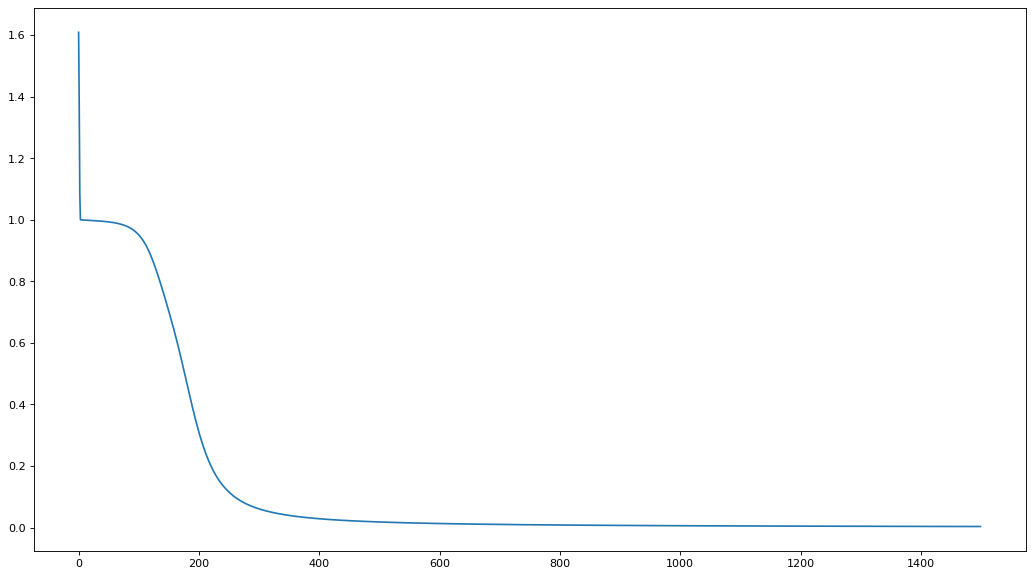

In [121]:
from matplotlib.pyplot import figure

figure(figsize=(16, 9), dpi=80)
x = np.arange(0, 1500, 1)
plt.plot(x, nn.loss)

Class idea: 
- Add learning rate
- Add bias 

In [2]:
import icalendar
import os

path = '/path/to/icalendar/files'
for filename in os.listdir(path):
    if filename.endswith('.ics'):
        with open(os.path.join(path, filename), 'rb') as f:
            calendar = icalendar.Calendar.from_ical(f.read())
            # process the calendar data


ModuleNotFoundError: No module named 'icalendar'